In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kütüphaneler hazır! 🚀")

Kütüphaneler hazır! 🚀


In [47]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

df = pd.read_csv(url)
df.to_csv("parkinson.csv", index=False)

print(df.shape)
print(df.head())
print(df['status'].value_counts())

(195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0  

In [48]:
print(df.isnull().sum())
print(df.describe())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940 

<function matplotlib.pyplot.show(close=None, block=None)>

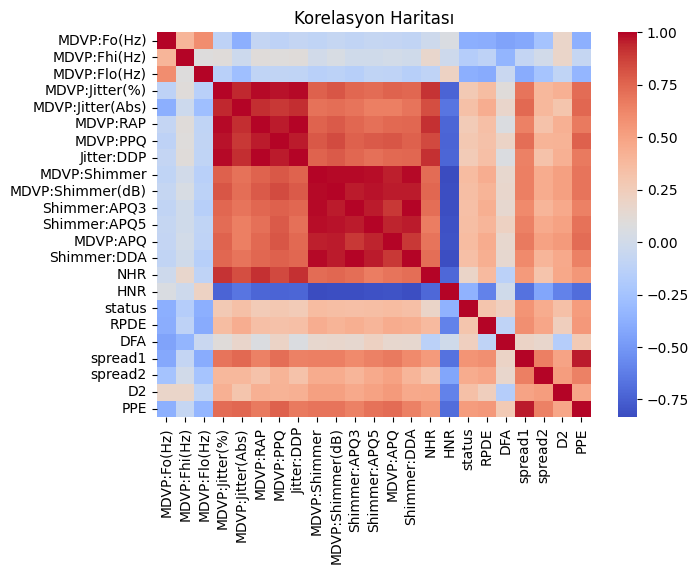

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(df.drop(columns=['name']).corr(),cmap='coolwarm', annot=False)
plt.title("Korelasyon Haritası")
plt.show

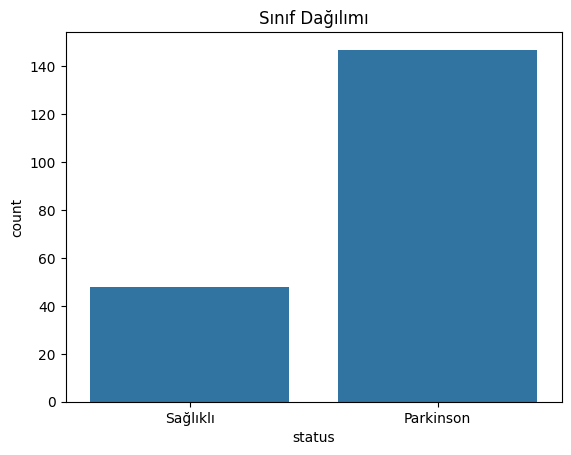

In [50]:
sns.countplot(x='status', data=df)
plt.title("Sınıf Dağılımı")
plt.xticks([0, 1], ['Sağlıklı','Parkinson'])
plt.show()

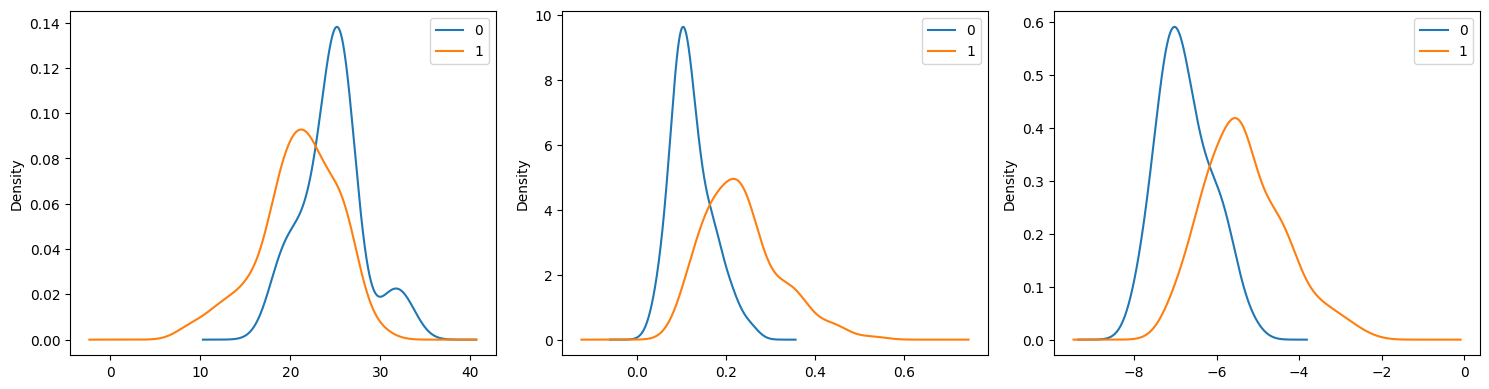

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for ax, col in zip(axes, ['HNR', 'PPE', 'spread1']):
    df.groupby('status')[col].plot(kind='kde', ax=ax, legend=True)
    
plt.tight_layout()
plt.show()

In [52]:
X = df.drop(columns=['name', 'status'])
Y = df['status']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(156, 22) (39, 22)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3))
print("F1 Score:", round(f1_score(Y_test, Y_pred), 3))

Accuracy: 0.872
F1 Score: 0.923


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf   = rf_model.predict(X_test)

print("Accuracy", round(accuracy_score(Y_test, Y_pred_rf), 3))
print("F1 Score", round(f1_score(Y_test, Y_pred_rf), 3))

Accuracy 0.949
F1 Score 0.97


In [56]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(rf_model, X_scaled, Y, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(rf_model, X_scaled, Y, cv=5, scoring='f1')

print("CV Accuracy:", cv_accuracy.round(3))
print("Ortalama:", cv_accuracy.mean().round(3))
print("CV F1:", cv_f1.round(3))
print("Ortalama:", cv_f1.mean().round(3))

CV Accuracy: [0.744 0.821 0.897 0.744 0.744]
Ortalama: 0.79
CV F1: [0.839 0.892 0.929 0.844 0.853]
Ortalama: 0.871


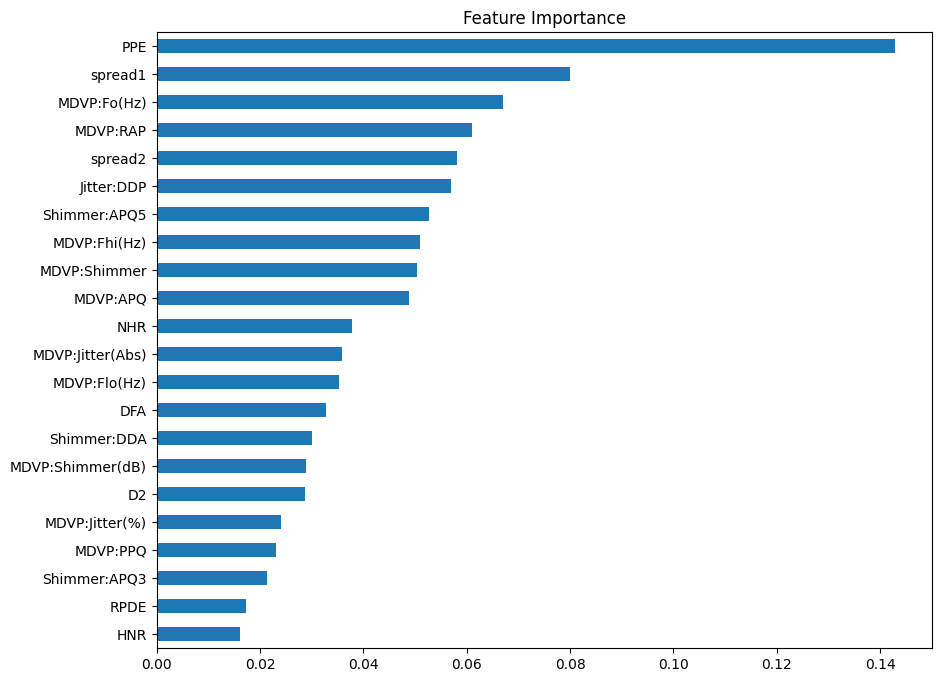

In [57]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importance")
plt.show()